# Lab 8: Define and Solve an ML Problem of Your Choosing

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [2]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")


df = pd.read_csv(adultDataSet_filename, header=0)

print(df.shape)
df.head(100)

(32561, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex_selfID,capital-gain,capital-loss,hours-per-week,native-country,income_binary
0,39.0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Non-Female,2174,0,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Non-Female,0,0,13.0,United-States,<=50K
2,38.0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Non-Female,0,0,40.0,United-States,<=50K
3,53.0,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Non-Female,0,0,40.0,United-States,<=50K
4,28.0,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,29.0,Local-gov,115585,Some-college,10,Never-married,Handlers-cleaners,Not-in-family,White,Non-Female,0,0,50.0,United-States,<=50K
96,48.0,Self-emp-not-inc,191277,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Non-Female,0,1902,NaN,United-States,>50K
97,37.0,Private,202683,Some-college,10,Married-civ-spouse,Sales,Husband,White,Non-Female,0,0,48.0,United-States,>50K
98,48.0,Private,171095,Assoc-acdm,12,Divorced,Exec-managerial,Unmarried,White,Female,0,0,NaN,England,<=50K


## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

1. I have chosen the censusData.csv data set.

2. My label will be the work class of the individual. Specifically, it will be a binary classifier evaluating whether or not the individual is a government employee. 

3. This is a supervised learning problem, and a classification problem (specifically, a binary classification problem).

4. My features are age, final weight (fnlwgt), education, education number, marital status, occupation, relationship, race, sexual self-identification, capital gain, capital loss, hours worked per week, native country, and income. 

5. By being able to predict whether or not an individual works for the government, companies could offer services that government employees already enjoy via benefits, to individuals who do not work for the government and therefore do not already receive those services. 

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [3]:
# Show type of each column
print(df.dtypes)

# Check for missing values
print(df.isnull().values.any())

# Get an overview of the data frame
print(df.head())

# View statistical measures of data frame
df.describe()

age               float64
workclass          object
fnlwgt              int64
education          object
education-num       int64
marital-status     object
occupation         object
relationship       object
race               object
sex_selfID         object
capital-gain        int64
capital-loss        int64
hours-per-week    float64
native-country     object
income_binary      object
dtype: object
True
    age         workclass  fnlwgt  education  education-num  \
0  39.0         State-gov   77516  Bachelors             13   
1  50.0  Self-emp-not-inc   83311  Bachelors             13   
2  38.0           Private  215646    HS-grad              9   
3  53.0           Private  234721       11th              7   
4  28.0           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race  sex_selfID  \
0       Never-married       Adm-clerical  Not-in-family  White  Non-Female   
1  Married-civ-spouse    Exec-managerial        Husband 

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32399.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32236.000000
mean,38.589216,1.897784e+05,10.080679,615.907773,87.303830,40.450428
std,13.647862,1.055500e+05,2.572720,2420.191974,402.960219,12.353748
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,14084.000000,4356.000000,99.000000


My data has several categorical features (object type) and contains missing data. Therefore, to prepare the idea, I plan to replace or remove missing values and one-hot encode categorical features. Also, since our desired label, 'workclass', is a multiclass categorical label, I will transform it to a binary categorical label, with only two classes (works for the government, or does not). Finally, since several of the numerical features are on different scales, I will normalize my data. Also, since our label is not a numerical label, I do not plan on removing outliers from the label, since there are no such outliers to speak of. 

## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

All of my features have relevance to the label, so I will not be removing any features. However, I will be one-hot encoding my cateogorical features, which will add several new feature columns. Specifically, I will one hot-encode the 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex_selfID', 'native-country', and 'income_binary' features. The data preparation techniques I plan to use are replacing missing values, one-hot encoding categorical features, changing the label to a binary classifier, converting boolean features to numerical features (due to new dummy feature columns that will be made from replacing missing values), and standardizing the data. Next I will split my data into training and test sets, with the test sets being made of one third of the original data. The algorithms I plan to try are k-nearest neighbors, decision trees, and logistic regression. Once my data has been prepared, I plan on performing three grid search cross-evaluations, one for each of the three candidate algorithms. These grid searches will allow me to find semi-optimal hyperparameter values for the three algorithms. Then, I will create a KNN model, a decision tree model, and a logistic regression model, and fit them to the training data. Finally, I will use accuracy scores to find the best model out of the three new candidate models. However, if the accuracy scores are too close, I will use other evaluation metrics such as confusion matrices to compare the models. My final model will be selected from the three candidate models.  

## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_curve

<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

First, we will prepare our data by replacing or removing missing values, one-hot encoding categorical features, transorming the type of our label into a binary classifier, converting boolean features to numerical features, and normalizing feature values.

In [5]:
# Check if the data frame has missing values
print(df.isnull().values.any())

True


In [6]:
# Find the number of missing values in each column 
nan_count = np.sum(df.isnull(), axis = 0)
print(nan_count)

age                162
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex_selfID           0
capital-gain         0
capital-loss         0
hours-per-week     325
native-country     583
income_binary        0
dtype: int64


In [7]:
# Store names of columns with missing values in a Python list
condition = nan_count != 0
col_names = nan_count[condition].index
nan_cols = list(col_names)

print(nan_cols)

['age', 'workclass', 'occupation', 'hours-per-week', 'native-country']


In [8]:
# Identify the data types of columns with missing values
nan_col_types = df[nan_cols].dtypes
print(nan_col_types)

age               float64
workclass          object
occupation         object
hours-per-week    float64
native-country     object
dtype: object


Our 'occupation', and 'native-country' features are of type string, as well as our 'workclass' label', so we will not impute values for their missing values. Instead, we will simply drop each example that contains a missing value for one of these three columns. However, 'age' and 'hours-per-week' are numerical features, so we will impute their missing data with the mean of each respective column.

In [9]:
# Remove rows with missing labels
df_cleaned = df.dropna(subset = ['workclass'])

# Remove rows with missing string-type features
df_cleaned = df_cleaned.dropna(subset = ['occupation', 'native-country'])

# Use shape function to verify that examples have been dropped
print(df.shape)
print(df_cleaned.shape)

(32561, 15)
(30162, 15)


Our strategy worked correctly, and, since only about six percent of our data got dropped, we did not lose a significant amount of data by dropping examples with missing string values. Now we will impute means for the two numerical features with missing values.

In [10]:
# Create dummy variables for missing values
df_cleaned['age_na'] = df['age'].isnull()
df_cleaned['hours-per-week_na'] = df['hours-per-week'].isnull()
df_cleaned.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex_selfID,capital-gain,capital-loss,hours-per-week,native-country,income_binary,age_na,hours-per-week_na
0,39.0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Non-Female,2174,0,40.0,United-States,<=50K,False,False
1,50.0,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Non-Female,0,0,13.0,United-States,<=50K,False,False
2,38.0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Non-Female,0,0,40.0,United-States,<=50K,False,False
3,53.0,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Non-Female,0,0,40.0,United-States,<=50K,False,False
4,28.0,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K,False,False


In [11]:
# Impute missing values in 'age' and 'hours-per-week' columns with respective means

mean_ages = df['age'].mean()  
print(mean_ages)
df_cleaned['age'] = df_cleaned['age'].fillna(value = mean_ages)

mean_hours = df['hours-per-week'].mean()
print(mean_hours)
df_cleaned['hours-per-week'] = df_cleaned['hours-per-week'].fillna(value = mean_hours)

38.58921571653446
40.450428092815486


In [12]:
# Find examples that have missing values for 'age' and 'hours-per-week'
print(df.loc[df['age'].isnull()])
print(df.loc[df['hours-per-week'].isnull()])

       age         workclass  fnlwgt     education  education-num  \
50     NaN           Private   32275  Some-college             10   
298    NaN           Private  278130       HS-grad              9   
433    NaN           Private   29662    Assoc-acdm             12   
524    NaN           Private  177905  Some-college             10   
852    NaN  Self-emp-not-inc  177407       HS-grad              9   
...    ...               ...     ...           ...            ...   
31501  NaN           Private  259301       HS-grad              9   
31617  NaN  Self-emp-not-inc  119793       HS-grad              9   
31636  NaN           Private   58484     Bachelors             13   
31913  NaN               NaN   90230       HS-grad              9   
31928  NaN           Private   44489       HS-grad              9   

           marital-status         occupation   relationship   race  \
50     Married-civ-spouse    Exec-managerial           Wife  Other   
298         Never-married      

'age' has a missing value at example index 50, and 'hours-per-week' has a missing value at example index 17. We will look at each of these rows in df_cleaned, and verify that the previously-missing value has been replaced with the correct mean.

In [13]:
print(df_cleaned['age'][50])
print(df_cleaned['hours-per-week'][17])

38.58921571653446
40.450428092815486


Now, there should no longer be any missing values in the newly-cleaned data frame. Let us verify...

In [14]:
print(df_cleaned.isnull().values.any())

False


Next, we will one-hot encode all categorical features. 

In [15]:
# Find the feature columns with categorical features ('object' type)
print(df_cleaned.drop(columns = ['workclass'], axis = 1).dtypes)

age                  float64
fnlwgt                 int64
education             object
education-num          int64
marital-status        object
occupation            object
relationship          object
race                  object
sex_selfID            object
capital-gain           int64
capital-loss           int64
hours-per-week       float64
native-country        object
income_binary         object
age_na                  bool
hours-per-week_na       bool
dtype: object


In [16]:
# Create a list of the feature columns of type 'object'
categorical_columns = df_cleaned.drop(columns = ['workclass'], axis = 1).select_dtypes(include=['object']).columns.tolist()
print(categorical_columns)

['education', 'marital-status', 'occupation', 'relationship', 'race', 'sex_selfID', 'native-country', 'income_binary']


In [17]:
# Find the number of unique values in 'categorical_nums' list to find valid candidates for one-hot encoding
unique_vals = df_cleaned[categorical_columns].nunique()
print(unique_vals)

education         16
marital-status     7
occupation        14
relationship       6
race               5
sex_selfID         2
native-country    41
income_binary      2
dtype: int64


All of our categorical feature columns have a number of unique values appropriate for one-hot encoding.

In [18]:
# Perform one-hot encoding
encoded_df = pd.get_dummies(df_cleaned, columns = categorical_columns, drop_first = True)
encoded_df.head()

,age,workclass,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,age_na,hours-per-week_na,education_11th,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income_binary_>50K
0,39.0,State-gov,77516,13,2174,0,40.0,False,False,0,...,0,0,0,0,0,0,1,0,0,0
1,50.0,Self-emp-not-inc,83311,13,0,0,13.0,False,False,0,...,0,0,0,0,0,0,1,0,0,0
2,38.0,Private,215646,9,0,0,40.0,False,False,0,...,0,0,0,0,0,0,1,0,0,0
3,53.0,Private,234721,7,0,0,40.0,False,False,1,...,0,0,0,0,0,0,1,0,0,0
4,28.0,Private,338409,13,0,0,40.0,False,False,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
# Re-assign df_cleaned data frame to one-hot encoded data frame
df_cleaned = encoded_df
df_cleaned.head()

,age,workclass,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,age_na,hours-per-week_na,education_11th,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income_binary_>50K
0,39.0,State-gov,77516,13,2174,0,40.0,False,False,0,...,0,0,0,0,0,0,1,0,0,0
1,50.0,Self-emp-not-inc,83311,13,0,0,13.0,False,False,0,...,0,0,0,0,0,0,1,0,0,0
2,38.0,Private,215646,9,0,0,40.0,False,False,0,...,0,0,0,0,0,0,1,0,0,0
3,53.0,Private,234721,7,0,0,40.0,False,False,1,...,0,0,0,0,0,0,1,0,0,0
4,28.0,Private,338409,13,0,0,40.0,False,False,0,...,0,0,0,0,0,0,0,0,0,0


Next, we will transform our label column into a binary classifier. 

In [20]:
# View the unique values of label column
print(df_cleaned['workclass'].unique())

['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov'
 'Self-emp-inc' 'Without-pay']


In [21]:
# Add binary classifier column for workclass (1 if government job, 0 otherwise)
df_cleaned['workclass_gov'] = df_cleaned['workclass'].apply(lambda x: 1 if (x == 'State-gov') or (x == 'Federal-gov') or (x == 'Local-gov') else 0)
df_cleaned.head()

,age,workclass,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,age_na,hours-per-week_na,education_11th,...,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income_binary_>50K,workclass_gov
0,39.0,State-gov,77516,13,2174,0,40.0,False,False,0,...,0,0,0,0,0,1,0,0,0,1
1,50.0,Self-emp-not-inc,83311,13,0,0,13.0,False,False,0,...,0,0,0,0,0,1,0,0,0,0
2,38.0,Private,215646,9,0,0,40.0,False,False,0,...,0,0,0,0,0,1,0,0,0,0
3,53.0,Private,234721,7,0,0,40.0,False,False,1,...,0,0,0,0,0,1,0,0,0,0
4,28.0,Private,338409,13,0,0,40.0,False,False,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
# Drop original label column
df_cleaned = df_cleaned.drop(columns = ['workclass'])
df_cleaned.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,age_na,hours-per-week_na,education_11th,education_12th,...,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income_binary_>50K,workclass_gov
0,39.0,77516,13,2174,0,40.0,False,False,0,0,...,0,0,0,0,0,1,0,0,0,1
1,50.0,83311,13,0,0,13.0,False,False,0,0,...,0,0,0,0,0,1,0,0,0,0
2,38.0,215646,9,0,0,40.0,False,False,0,0,...,0,0,0,0,0,1,0,0,0,0
3,53.0,234721,7,0,0,40.0,False,False,1,0,...,0,0,0,0,0,1,0,0,0,0
4,28.0,338409,13,0,0,40.0,False,False,0,0,...,0,0,0,0,0,0,0,0,0,0


Next, we will convert boolean features into numerical features. 

In [23]:
# Find columns with boolean values
bool_columns = df_cleaned.select_dtypes(include=['bool']).columns.tolist()
print(bool_columns)

['age_na', 'hours-per-week_na']


In [24]:
# Convert 'bool_columns' values to integers
df_cleaned[bool_columns] = df_cleaned[bool_columns].astype(int)
df_cleaned[bool_columns].head()

,age_na,hours-per-week_na
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


Finally, I will normalize all my feature values using standardization.

In [25]:
# Separate label column
label = df_cleaned['workclass_gov']

# Standardize features
scaler = StandardScaler()
standardized = scaler.fit_transform(df_cleaned.drop(columns = ['workclass_gov'], axis = 1))

# Convert to data frame
standardized_features = pd.DataFrame(standardized, columns = df_cleaned.drop(columns = ['workclass_gov'], axis = 1).columns)

# Re-attach label
standardized_df = pd.concat([standardized_features, label.reset_index(drop = True)], axis = 1)

df_cleaned = standardized_df
df_cleaned.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,age_na,hours-per-week_na,education_11th,education_12th,...,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income_binary_>50K,workclass_gov
0,0.042472,-1.062722,1.128918,0.631267,-0.218586,-0.078499,-0.070697,-0.099723,-0.189727,-0.112505,...,-0.019101,-0.048575,-0.037342,-0.023747,-0.024436,0.310871,-0.046113,-0.023038,-0.575691,1
1,0.881621,-1.007871,1.128918,-0.256971,-0.218586,-2.341512,-0.070697,-0.099723,-0.189727,-0.112505,...,-0.019101,-0.048575,-0.037342,-0.023747,-0.024436,0.310871,-0.046113,-0.023038,-0.575691,0
2,-0.033814,0.244693,-0.439738,-0.256971,-0.218586,-0.078499,-0.070697,-0.099723,-0.189727,-0.112505,...,-0.019101,-0.048575,-0.037342,-0.023747,-0.024436,0.310871,-0.046113,-0.023038,-0.575691,0
3,1.110480,0.425240,-1.224066,-0.256971,-0.218586,-0.078499,-0.070697,-0.099723,5.270724,-0.112505,...,-0.019101,-0.048575,-0.037342,-0.023747,-0.024436,0.310871,-0.046113,-0.023038,-0.575691,0
4,-0.796677,1.406658,1.128918,-0.256971,-0.218586,-0.078499,-0.070697,-0.099723,-0.189727,-0.112505,...,-0.019101,-0.048575,-0.037342,-0.023747,-0.024436,-3.216773,-0.046113,-0.023038,-0.575691,0


In [26]:
# Now that data is fully prepared, reassign variable
df = df_cleaned
df.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,age_na,hours-per-week_na,education_11th,education_12th,...,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income_binary_>50K,workclass_gov
0,0.042472,-1.062722,1.128918,0.631267,-0.218586,-0.078499,-0.070697,-0.099723,-0.189727,-0.112505,...,-0.019101,-0.048575,-0.037342,-0.023747,-0.024436,0.310871,-0.046113,-0.023038,-0.575691,1
1,0.881621,-1.007871,1.128918,-0.256971,-0.218586,-2.341512,-0.070697,-0.099723,-0.189727,-0.112505,...,-0.019101,-0.048575,-0.037342,-0.023747,-0.024436,0.310871,-0.046113,-0.023038,-0.575691,0
2,-0.033814,0.244693,-0.439738,-0.256971,-0.218586,-0.078499,-0.070697,-0.099723,-0.189727,-0.112505,...,-0.019101,-0.048575,-0.037342,-0.023747,-0.024436,0.310871,-0.046113,-0.023038,-0.575691,0
3,1.110480,0.425240,-1.224066,-0.256971,-0.218586,-0.078499,-0.070697,-0.099723,5.270724,-0.112505,...,-0.019101,-0.048575,-0.037342,-0.023747,-0.024436,0.310871,-0.046113,-0.023038,-0.575691,0
4,-0.796677,1.406658,1.128918,-0.256971,-0.218586,-0.078499,-0.070697,-0.099723,-0.189727,-0.112505,...,-0.019101,-0.048575,-0.037342,-0.023747,-0.024436,-3.216773,-0.046113,-0.023038,-0.575691,0


The data has been fully prepared by replacing missing data, one-hot encoding categorical features, transforming the label to a binary classifier, and transforming boolean features to integer features. Now, it is time for model selection. My three candidate algorithms are KNN, Decision Trees, and logistic regression. I will split my data into training and test sets, then perform three grid search cross-evaluations, one for each of the candidate algorithms, for different hyperparamter values. Once we have the optimal hyperparamter values for each of the three algorithms, we will train three models using those hyperparameters, and compare the performance of the three. 

In [27]:
# Create training and test sets

y = df['workclass_gov']
X = df.drop(columns = ['workclass_gov'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 1234)

Now, we will perform a grid search for KNN models with 10 values of n_neighbors. 

In [28]:
# Set up parameter grid

params = [1, 2, 3, 5, 8, 13, 21, 34, 55, 89]  # Part of fibonacci sequence
param_grid = {
    'n_neighbors': params,
}

print(param_grid)

{'n_neighbors': [1, 2, 3, 5, 8, 13, 21, 34, 55, 89]}


In [29]:
# Perform grid search with 5 folds

print("Starting grid search...")

model = KNeighborsClassifier()
grid = GridSearchCV(model, param_grid, cv = 5)
grid_search = grid.fit(X_train, y_train)

print("Grid search complete.")

Starting grid search...
Grid search complete.


In [30]:
# Find and save best value for 'n_neighbors' hyperparamter 

best_k = grid_search.best_params_['n_neighbors']
print(best_k)

34


Now, we will perform a grid search for decision tree models with 10 values of max_depth and min_samples_leaf.

In [31]:
# Set up parameter grid

depth_params = [1, 2, 3, 5, 8, 13, 21, 34, 55, 89] 
leaf_params = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

param_grid = {
    'max_depth': depth_params,
    'min_samples_leaf': leaf_params
}

print(param_grid)

{'max_depth': [1, 2, 3, 5, 8, 13, 21, 34, 55, 89], 'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}


In [32]:
# Perform grid search with 5 folds

print("Starting grid search...")

model = DecisionTreeClassifier()
grid = GridSearchCV(model, param_grid, cv = 5)
grid_search = grid.fit(X_train, y_train)

print("Grid search complete.")

Starting grid search...
Grid search complete.


In [33]:
# Find and save best value for 'max_depth' and 'min_samples_leaf' hyperparamters

best_depth = grid_search.best_params_['max_depth']
best_leaf = grid_search.best_params_['min_samples_leaf']

print(best_depth)
print(best_leaf)

5
4


Now, we will perform a grid search for logistic regression models with 10 values of c. 

In [34]:
# Set up parameter grid

c_params = [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50]

param_grid = {
    'C': c_params
}

print(param_grid)

{'C': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50]}


In [35]:
# Perform grid search with 5 folds

print("Starting grid search...")

model = LogisticRegression()
grid = GridSearchCV(model, param_grid, cv = 5)
grid_search = grid.fit(X_train, y_train)

print("Grid search complete.")

Starting grid search...
Grid search complete.


In [36]:
# Find and save best value for 'C' hyperparamter

best_c = grid_search.best_params_['C']

print(best_c)

0.05


Now that we have found some (relatively) optimal values for our hyperparameters, we will train three models, a KNN model, a DT model, and a logistic regression model, with the optimal hyperparameters for each. 

In [37]:
# Create and train models

knn_model = KNeighborsClassifier(n_neighbors = best_k)
knn_model.fit(X_train, y_train)

dt_model = DecisionTreeClassifier(max_depth = best_depth, min_samples_leaf = best_leaf)
dt_model.fit(X_train, y_train)

lr_model = LogisticRegression(C = best_c)
lr_model.fit(X_train, y_train)

LogisticRegression(C=0.05)

Now we will use each model to generate predictions and compare those predictions to the actual values, generating an accuracy score for each model.

In [38]:
# Generate accuracy scores

class_label_predictions1 = knn_model.predict(X_test)
knn_acc_score = accuracy_score(y_test, class_label_predictions1)

class_label_predictions2 = dt_model.predict(X_test)
dt_acc_score = accuracy_score(y_test, class_label_predictions2)

class_label_predictions3 = lr_model.predict(X_test)
lr_acc_score = accuracy_score(y_test, class_label_predictions3)

print(f"KNN model accuracy score: {knn_acc_score}")
print(f"DT model accuracy score: {dt_acc_score}")
print(f"LR model accuracy score: {lr_acc_score}")

KNN model accuracy score: 0.8645770544504722
DT model accuracy score: 0.8653807514567008
LR model accuracy score: 0.8651798272051436


All three of our models have similar accuracy scores, so we will take a look at other evaluation metrics, starting with the respective confusion matrices.

In [39]:
# Generate confusion matrices

cm_1 = confusion_matrix(y_test, class_label_predictions1)
cm_2 = confusion_matrix(y_test, class_label_predictions2)
cm_3 = confusion_matrix(y_test, class_label_predictions3)

print(f"{cm_1}\n")
print(f"{cm_2}\n")
print(f"{cm_3}\n")

[[8418  119]
 [1229  188]]

[[8464   73]
 [1267  150]]

[[8425  112]
 [1230  187]]



The values of each of the spaces in the confusion matrices are all fairly similar. However, it appears that the second model, the DT model, had the highest number of true positives (not significantly), as well as the smallest number of false positives, to a significant degree (73 vs. 119 and 115). Based off of this, I am most inclined to stick with the DT model. However, let's also look at the precision-recall curves for the three models.

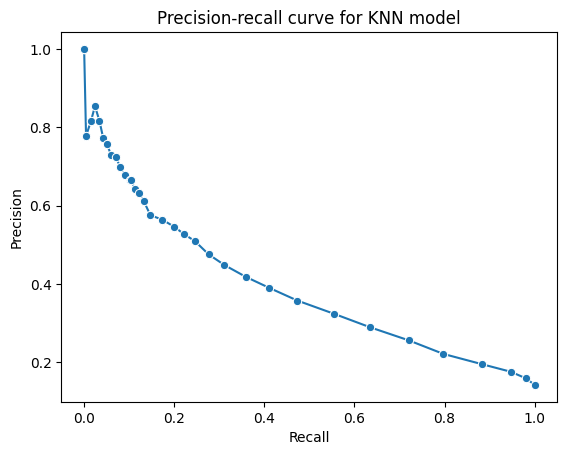

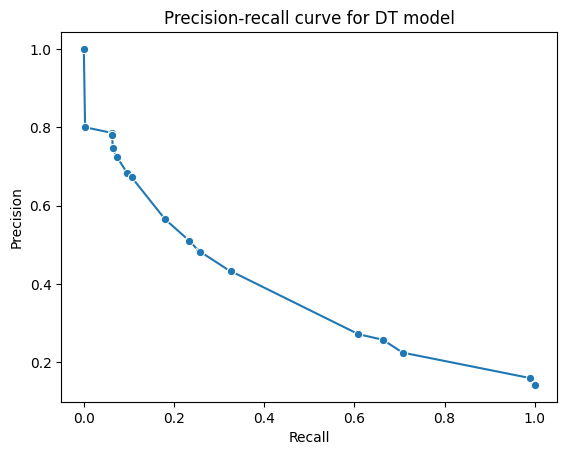

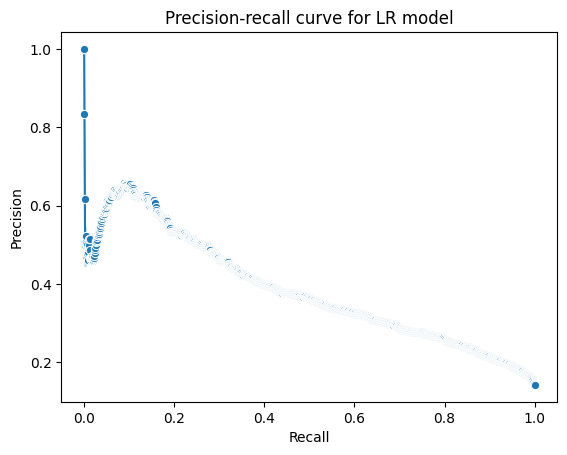

In [40]:
# Generate probability predictions
probability_predictions1 = knn_model.predict_proba(X_test)[:, 1]
probability_predictions2 = dt_model.predict_proba(X_test)[:, 1]
probability_predictions3 = lr_model.predict_proba(X_test)[:, 1]

# Generate precision, recall, and threshold values

precision1, recall1, thresholds1 = precision_recall_curve(y_test, probability_predictions1)
precision2, recall2, thresholds2 = precision_recall_curve(y_test, probability_predictions2)
precision3, recall3, thresholds3 = precision_recall_curve(y_test, probability_predictions3)

# Create precision-recall curves

fig = plt.figure()
ax = fig.add_subplot(111)

sns.lineplot(x = recall1, y = precision1, marker = 'o')
plt.title("Precision-recall curve for KNN model")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()

sns.lineplot(x = recall2, y = precision2, marker = 'o')
plt.title("Precision-recall curve for DT model")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()

sns.lineplot(x = recall3, y = precision3, marker = 'o')
plt.title("Precision-recall curve for LR model")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()

Based on the evaluation metrics we have applied, I would choose the decision tree model as my final model. I will save my finalized model to the variable 'model' below.

In [41]:
model = dt_model

# Generate predictions again and display accuracy score

class_label_predictions = model.predict(X_test)
acc_score = accuracy_score(y_test, class_label_predictions)
print(acc_score)

0.8653807514567008
